# Exploring Ratio Ratio Comparisons with Synthetic Power Spectra

## Plans / ToDo

- Here: exploring (ad-hoc / idiosyncratically) doing ratio measures on PSDs
    - Compare simple pairwise comparisons of ratio measures between PSDs
 

- We need to tie approaches here to the real literature (make sure we are doing things in real ways)
    - Step 1: read and figure out what they are doin
        - How do they calculate: Mean vs Sum / Frequency Ranges / Calculated direct from PSDs?
        - What are normal values / ranges for the ratios themselves, and for differences measures.
    - Step 2: integrate the findigns from the literature sweep into here


- This notebook can, and should become an introductory notebook to the project
    - It will overview the methods, and can link to the most salient papers
    - It can show a couple salient examples of, for example, slope change, frequency drift, etc
    - One should be able to 'see' what we're doing here, and how it works 
        - In terms of the data generation, ratio methods, simple comparisons, and parameters of interest. 


- From here, move into setting up 'real' simulations
    - This notebook will stay as a baseline exploration, to get a feel
        - It will be used to solidify methods & approaches, and to sanity check outcomes
    - Then we move to comparing across groups, systematically and formally across parameters sets of interest

## A note on oscillation band measures

### Canonical Measure
- The canonical way of measuring band ratios is to find the average power within a band and divide it by the average power in another bandwidth. Average is calculated by suming the power value of each sample in a bandwidth and dividing by the number of samples in that band.

### Potential Updates to the measures
- Find the CF, preset BW, and do average power within bands, then calculate ratio between bands
-  Find the CF, take the power @ CF, do ratio across CF-AMP

## Notes:

- *Fill this in with any interest notes from these explorations*

In [18]:
%matplotlib inline

import numpy as np

#import fooof
from fooof.synth import gen_power_spectrum
from fooof import FOOOF
from fooof.analysis import get_band_peak

# Project specific code
from utils.ratios import calc_theta_beta_ratio
from utils.plts import plot_fm_shading

# Generate and explore pairwise comparisons

In [3]:
# Power Spectrum Settings
f_range = [3, 40]
bg_params1 = [1, 1.0]
bg_params2 = [1, 1.0]
gauss_params1 = []
gauss_params2 = []

In [39]:
# Ratio Settings
theta_range = [4, 8]
beta_range = [15, 30]

In [5]:
# Generate a couple power spectra
fs, ps1 = gen_power_spectrum(f_range, bg_params1, gauss_params1)
fs, ps2 = gen_power_spectrum(f_range, bg_params2, gauss_params2)

In [6]:
fm = FOOOF()

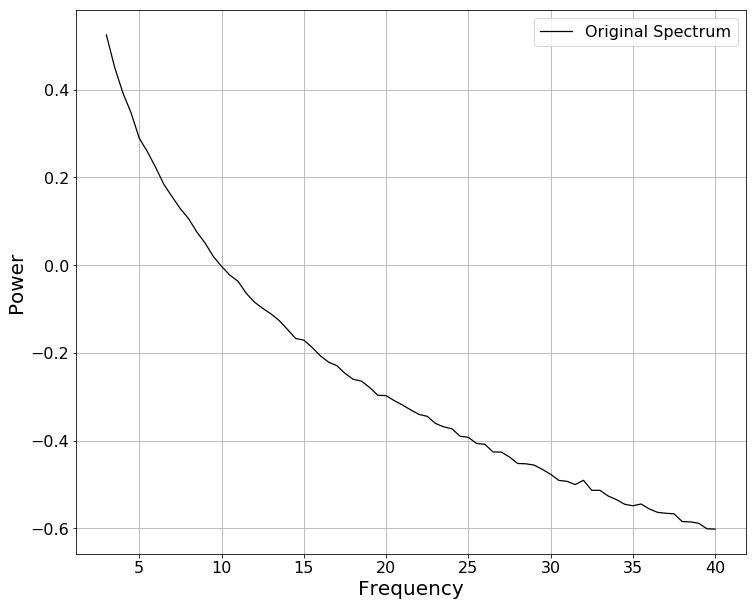

In [7]:
fm.add_data(fs, ps1)
fm.plot()

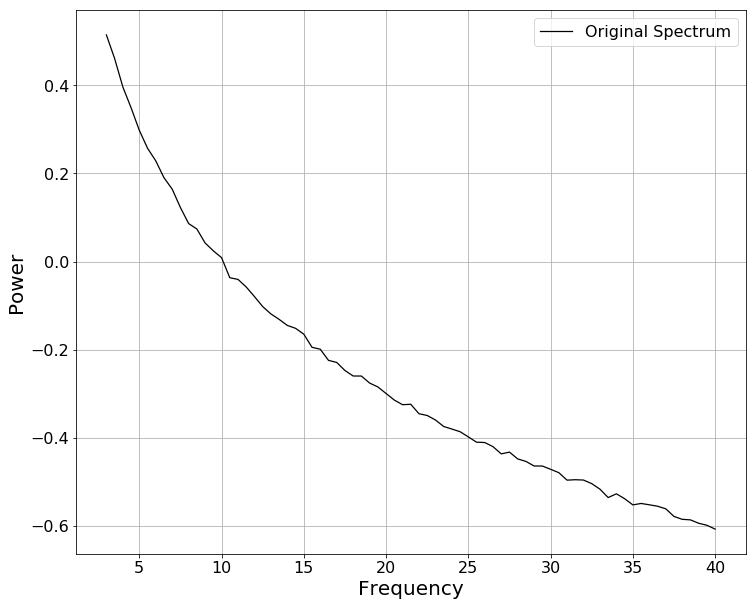

In [7]:
fm.add_data(fs, ps2)
fm.plot()

### Calculate theta / beta ratios

In [21]:
# Calculate theta-beta ratios
tbr_1 = calc_theta_beta_ratio(fs, ps1)
tbr_2 = calc_theta_beta_ratio(fs, ps2)

In [22]:
# Check the difference in theta/beta ratio between PSDs
delta_tbr = np.abs(tbr_1 - tbr_2)
print(delta_tbr)

0.008150881011000255


Here, we find a difference in theta-beta ratio between the two power spectra. 

This difference comes from a difference background slope, as there are no oscillations present at all.

## Explore Oscillations

In [23]:
# Generate a power spectum with canonical oscillation bands
fs, ps1 = gen_power_spectrum(f_range, [1, 1], [6, 0.25, 0.5, 25, 0.5, 1])

# Generate a power spectum with shifted frequency bands: high theta
fs, ps2 = gen_power_spectrum(f_range, [1, 1], [8, 0.25, 0.5, 25, 0.5, 1])

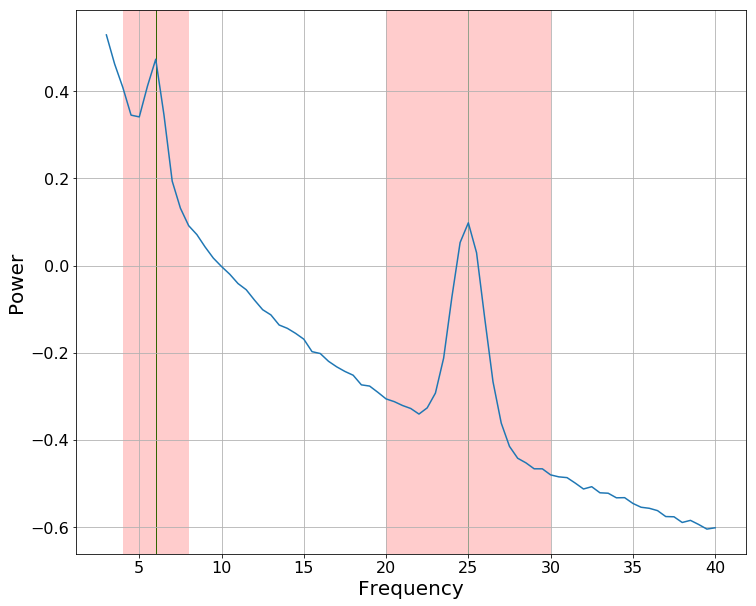

In [24]:
# Plot canonical oscillation band spectrum, with canonical ratio bands shaded
fm.add_data(fs, ps1)
plot_fm_shading(fm, [6, 25], [2, 5])

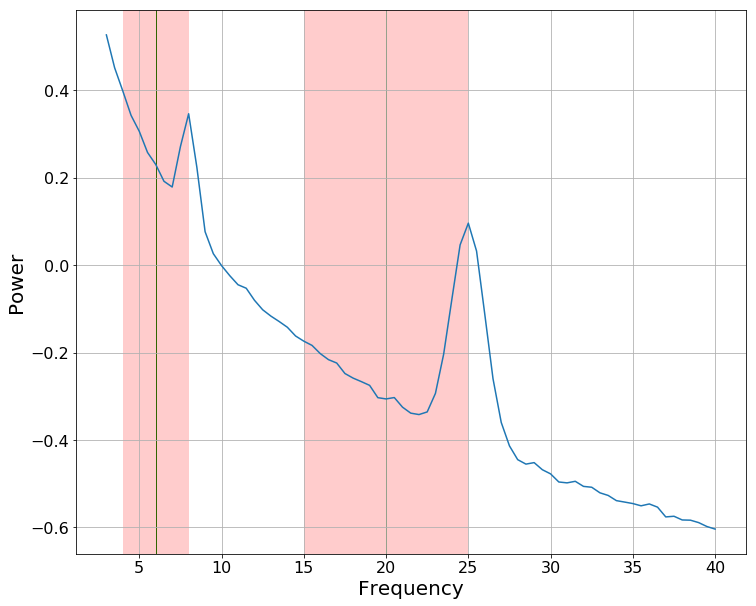

In [12]:
# Plot shifted oscillation band spectrum, with canonical ratio bands shaded
fm.add_data(fs, ps2)
plot_fm_shading(fm, [6, 20], [2, 5])

In [25]:
fm.fit()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is freq-res)
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



In [13]:
# Calculate theta-beta ratios
tbr_1 = calc_theta_beta_ratio(fs, ps1)
tbr_2 = calc_theta_beta_ratio(fs, ps2)

In [14]:
# Check the difference in theta/beta ratio between PSDs
delta_tbr = np.abs(tbr_1 - tbr_2)
print(delta_tbr)

0.247355519944


Here, we find a difference in theta-beta ration between the two power spectra. 

This difference comes from a difference in center frequency, as there is no difference in oscillation power. 